## Modelo svm

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('../Entrega2/data/Titanic-Dataset-Canvas.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Data engineering

In [9]:
((df.isnull().sum())/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
df.drop('Cabin',axis=1,inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace = True)

((df.isnull().sum())/len(df))*100

C:\Users\david\AppData\Local\Temp\ipykernel_24580\1924632447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [11]:
def missing_percent(df):
    nan_percent=((df.isnull().sum())/len(df))*100
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent
nan_percent=missing_percent(df)
nan_percent

Embarked    0.224467
dtype: float64

In [12]:
df.drop(['PassengerId','Name','Ticket','Fare','Embarked'],axis=1, inplace=True)
df.loc[df['Sex']=='male','Sex']=1
df.loc[df['Sex']=='female','Sex']=0
nan_percent=missing_percent(df)
nan_percent

Series([], dtype: float64)

### EDA

In [13]:
df.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Survived    1.000000
Name: Survived, dtype: float64

<Axes: >

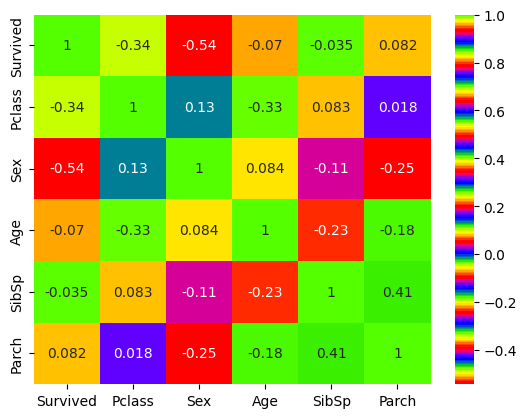

In [14]:
sns.heatmap(df.corr(),annot=True,cmap="prism")

### Entrenando el modelo

In [15]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [18]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train , y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
y_pred=model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[48,  3],
       [35,  4]])

In [30]:
print(classification_report(y_test, y_pred))
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, matthews_corrcoef,
    balanced_accuracy_score, brier_score_loss
)

# For binary classification, use pos_label=1
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
brier = brier_score_loss(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"PR AUC: {pr_auc:.3f}")
print(f"Matthews Corrcoef: {mcc:.3f}")
print(f"Balanced Accuracy: {balanced_acc:.3f}")
print(f"Brier Score: {brier:.3f}")

              precision    recall  f1-score   support

           0       0.58      0.94      0.72        51
           1       0.57      0.10      0.17        39

    accuracy                           0.58        90
   macro avg       0.57      0.52      0.45        90
weighted avg       0.58      0.58      0.48        90

Accuracy: 0.578
Precision: 0.571
Recall: 0.103
F1 Score: 0.174
ROC AUC: 0.522
PR AUC: 0.447
Matthews Corrcoef: 0.081
Balanced Accuracy: 0.522
Brier Score: 0.422


### Optimizando hiperparametros

In [22]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(svm,param_grid, cv=5)

In [23]:
grid.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'gamma': [1, 0.1, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [24]:
grid.best_estimator_

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [25]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [26]:
y_pred_grid= grid.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred_grid)

array([[47,  4],
       [14, 25]])

In [28]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        51
           1       0.86      0.64      0.74        39

    accuracy                           0.80        90
   macro avg       0.82      0.78      0.79        90
weighted avg       0.81      0.80      0.79        90



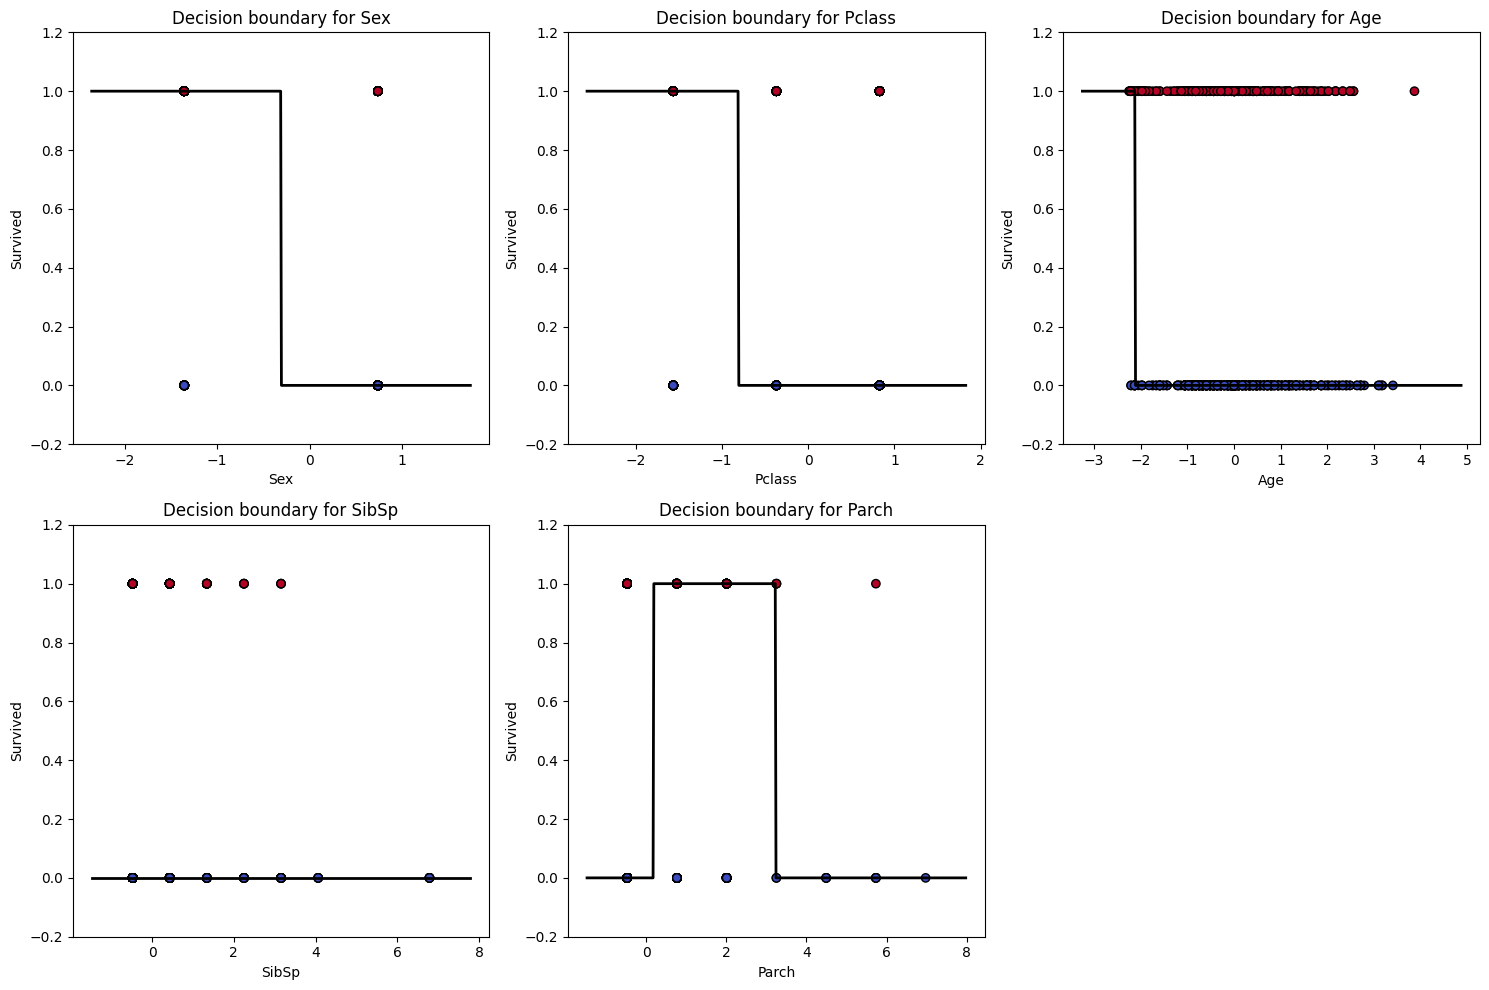

In [29]:
features = ['Sex', 'Pclass', 'Age', 'SibSp', 'Parch']
y = df['Survived'].values

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    X_feat = df[[feature]].values
    scaler_feat = StandardScaler()
    X_feat_scaled = scaler_feat.fit_transform(X_feat)
    
    svm_1d = SVC(kernel='rbf', C=1, gamma=0.1)
    svm_1d.fit(X_feat_scaled, y)
    
    # Create grid for plotting
    x_min, x_max = X_feat_scaled.min() - 1, X_feat_scaled.max() + 1
    xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)
    Z = svm_1d.predict(xx)
    
    plt.subplot(2, 3, i+1)
    plt.scatter(X_feat_scaled, y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.plot(xx, Z, color='black', linewidth=2)
    plt.title(f'Decision boundary for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.ylim(-0.2, 1.2)
plt.tight_layout()
plt.show()

In [31]:
import pickle

# Save the trained SVM model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the results (metrics) as a dictionary
results = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'roc_auc': roc_auc,
    'pr_auc': pr_auc,
    'matthews_corrcoef': mcc,
    'balanced_accuracy': balanced_acc,
    'brier_score': brier
}

with open('svm_results.pkl', 'wb') as f:
    pickle.dump(results, f)